*converting analog signal to digital using ADC*
---
Two important parameters :
* Quantization levels ▶ 2^n  [ 0 , (2^n)-1 ]
* sampling time

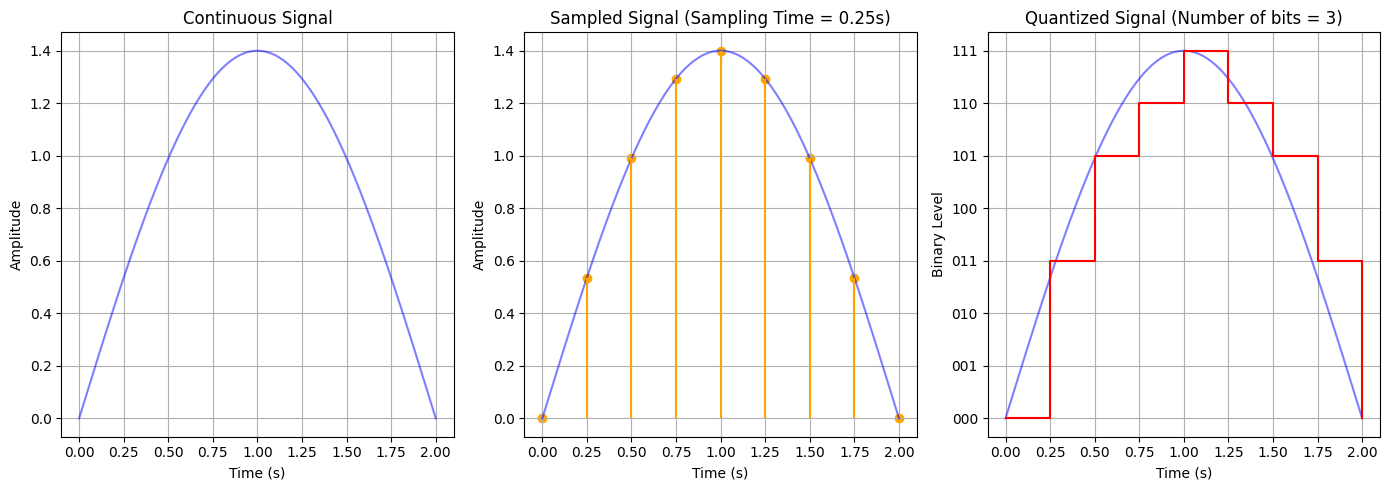

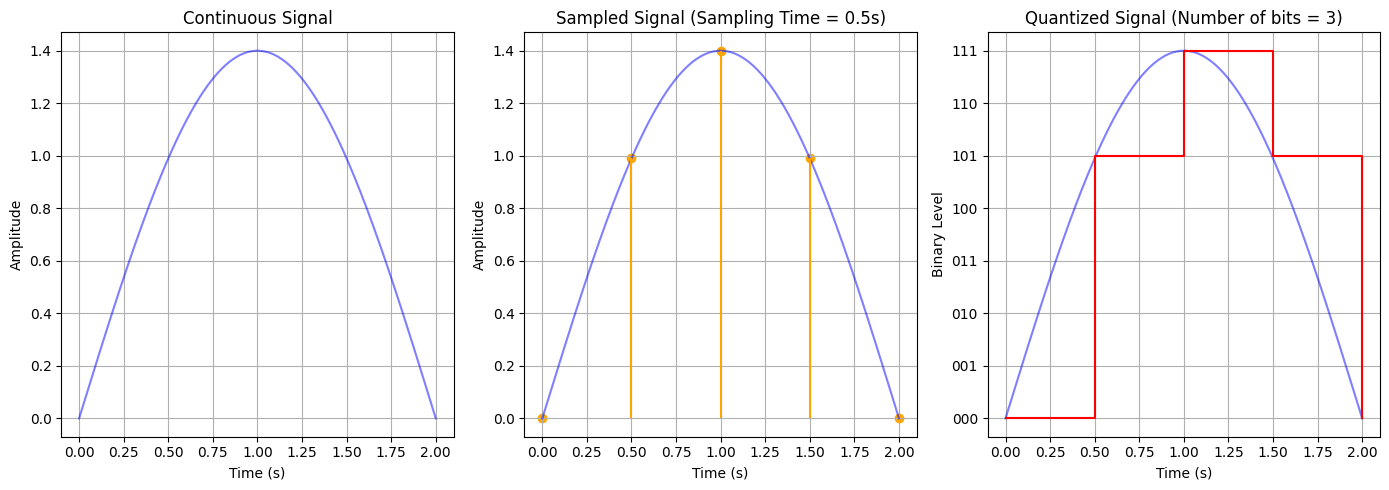

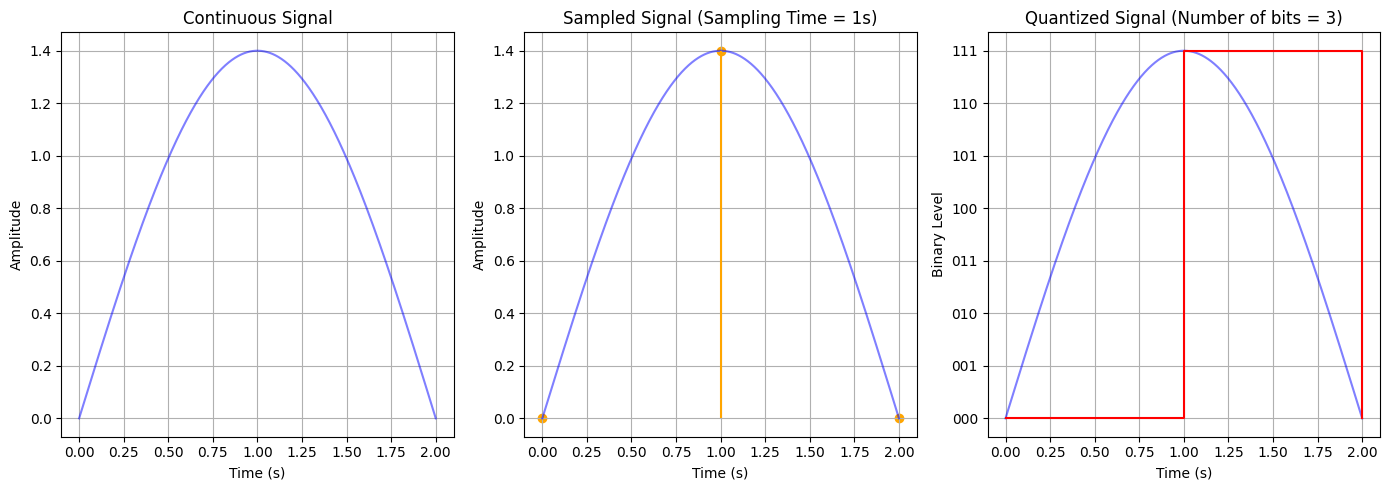

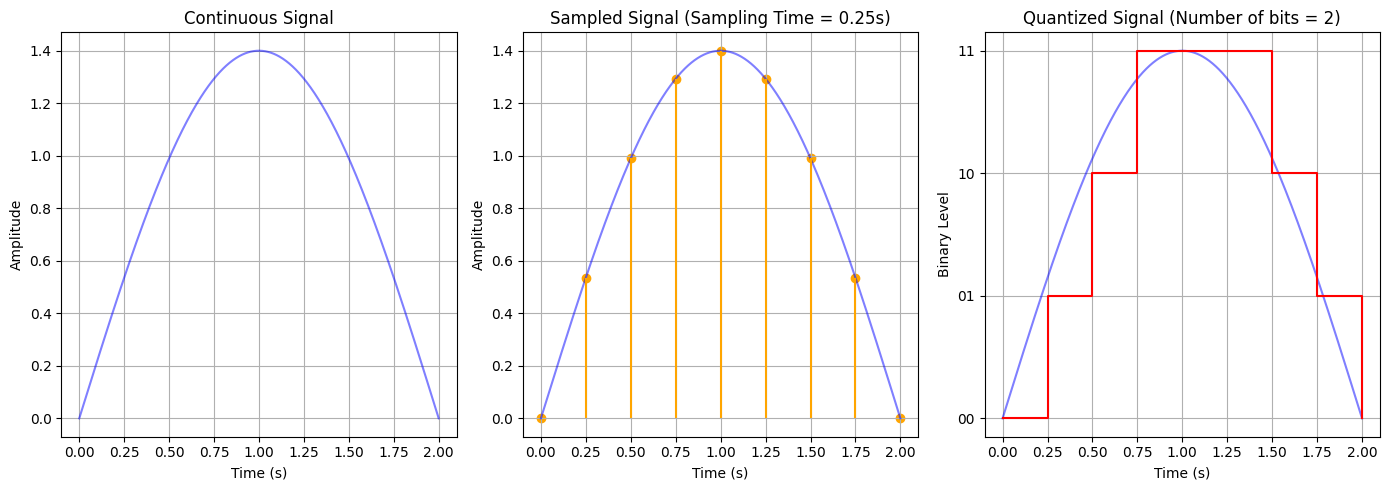

In [76]:
import numpy as np
import matplotlib.pyplot as plt

T = 2
# Half sine wave function
def half_sine_wave(t):
    return 1.4*(np.sin(np.pi * t / T)) #amplitude of sinwave = 1.4

# Quantization function
def quantize(signal, levels):
    step_size = 1.4 / (levels - 1)

    # Round the input values to the nearest quantization level
    quantized_signal = np.round(signal / step_size) * step_size

    # Clip the quantized values to the input range
    quantized_signal = np.clip(quantized_signal, 0, 1.4)

    return quantized_signal

def plotting(ts, n):  #ts = sampling time, n = no. of bits
    plt.figure(figsize=(14, 5))

    # Plot continuous signal
    t_cont = np.linspace(0, T, 1000)
    signal_cont = half_sine_wave(t_cont)
    plt.subplot(1, 3, 1)
    plt.plot(t_cont, signal_cont, label='Continuous Signal', color='blue', alpha=0.5)
    plt.title('Continuous Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # Plot sampled signal
    t_sample = np.arange(start=0, stop= T + ts, step=ts)
    signal_sample = half_sine_wave(t_sample)
    levels = 2 ** n
    quantized_signal = quantize(signal_sample, levels)

    # binary levels to match the number of quantization levels
    binary_levels = [format(i, f'0{n}b') for i in range(levels)]

    plt.subplot(1, 3, 2)
    plt.plot(t_cont, signal_cont, color='blue', alpha=0.5)
    plt.vlines(t_sample,0, signal_sample, label='Sampled Signal', color='orange') # plot vertical lines for samples or plot it continous using plt.step
    #plt.step(t_sample, signal_sample, color='orange', where='post')
    plt.scatter(t_sample, signal_sample, color='orange',marker='o') #adding mark on the sample value
    plt.title(f'Sampled Signal (Sampling Time = {ts}s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # Plot quantized signal
    plt.subplot(1, 3, 3)
    plt.plot(t_cont, signal_cont, color='blue', alpha=0.5)
    plt.step(t_sample, quantized_signal, label='Quantized Signal', color='red', where='post')
    plt.yticks(np.arange(0, 1.4 + 1e-10, 1.4 / (levels - 1)), binary_levels)  #plot binary levels
    plt.title(f'Quantized Signal (Number of bits = {n})')
    plt.xlabel('Time (s)')
    plt.ylabel('Binary Level')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

sampling_times = [0.25, 0.5, 1]  # Sampling times in seconds
no_bits = [2, 3]  # number of bits

for t in sampling_times:
    plotting(t, no_bits[1])

plotting(sampling_times[0], no_bits[0])

**Conclusion**
---
Taking large no of bits --> small step size and taking Small Sampling Time
Provides the most accurate representation of the original continuous signal with minimal quantization error and aliasing.

---
Taking small no of bits --> large step size lead to potential aliasing


---
Taking Larger Sampling Time Results in more significant quantization error

---


So balancing the two features is important for achieving high quality signalts ,
for our example
* ts= 0.25s ,n= 3bits was the best (smallest sampling time , largest no of bits)
* ts=1s , n=3 bits lead to aliasing
* ts=0.25 , n=2 signal representation is better than ts=0.5, n= 3
